# Model Evaluation (Titanic Dataset)

In this notebook, we will:
- Train the best-performing model fully on the training set
- Evaluate performance on the test set
- Compare metrics and visualize results
- Check feature importance for interpretation
- Make predictions for Kaggle test.csv and prepare submission

### Step 1: Import libraries and load cleaned dataset
We will use Pandas for data manipulation and scikit-learn for ML models.

In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve,auc

df = pd.read_csv(r"D:\Thiru\ML_Projects\Titanic-Survival-Prediction\Data\processed\cleaned_titanic.csv")

X=df.drop('Survived',axis=1)
Y=df['Survived']

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=.2, random_state=42)

print('Training Samples', X_train.shape)
print('Testing Samples', X_test.shape)

Training Samples (712, 9)
Testing Samples (179, 9)


### Step 2: Train the final model
we select **RandomForestClassifier** as our best model.

In [33]:
model=RandomForestClassifier(random_state=42)

model.fit(X_train, Y_train)

Y_pred=model.predict(X_test)
Y_prob=model.predict_proba(X_test)[:,-1]

**Explanation:**

- Random Forest is selected based on Algorithm-comparison notebook results.
- Trained on entire training set.
- `y_pred` = predicted classes, `y_prob` = probabilities for ROC/AUC.


### Step 3: Accuracy

In [34]:
accu=accuracy_score(Y_pred,Y_test)*100
print(f'Accuracy_Score:{accu:.2f}')

Accuracy_Score:81.56


**Insight:**

- Measures overall correct predictions.
- Compare with Algorithm-comparison notebook cross-validation accuracy.

### Step 4: Confusion Matrix

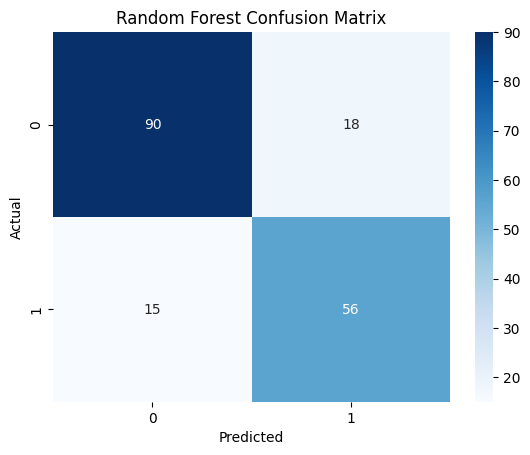

In [38]:
cm=confusion_matrix(Y_pred,Y_test)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()